In [85]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from ucimlrepo import fetch_ucirepo 

In [56]:
# fetch dataset 
Drugs = fetch_ucirepo(id=462) 

In [34]:
# data (as pandas dataframes) 
drug_features = Drugs.data.features
  
# variable info. 
print(Drugs.metadata["additional_info"]["variable_info"]) 

1. drugName (categorical): name of drug
2. condition (categorical): name of condition
3. review (text): patient review
4. rating (numerical): 10 star patient rating
5. date (date): date of review entry
6. usefulCount (numerical): number of users who found review useful


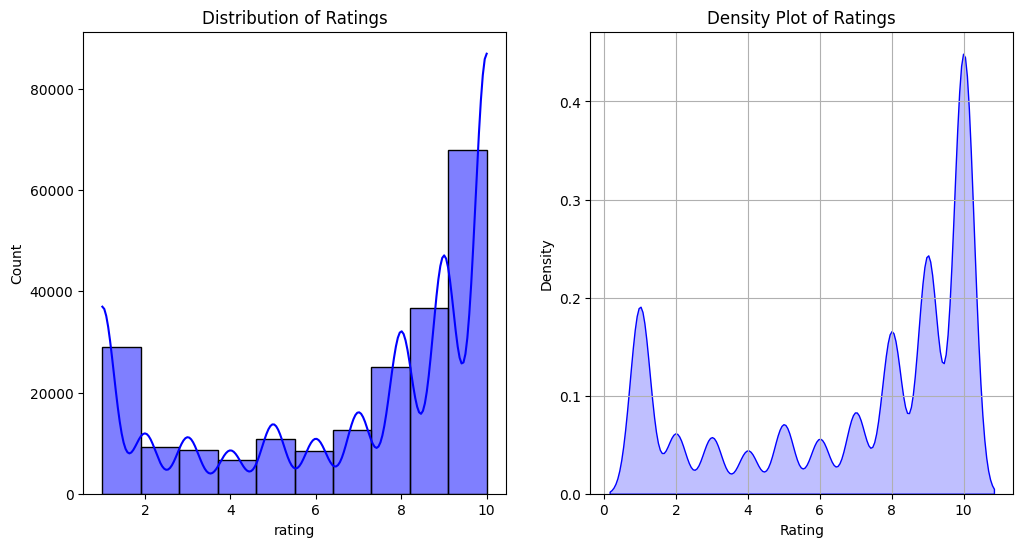

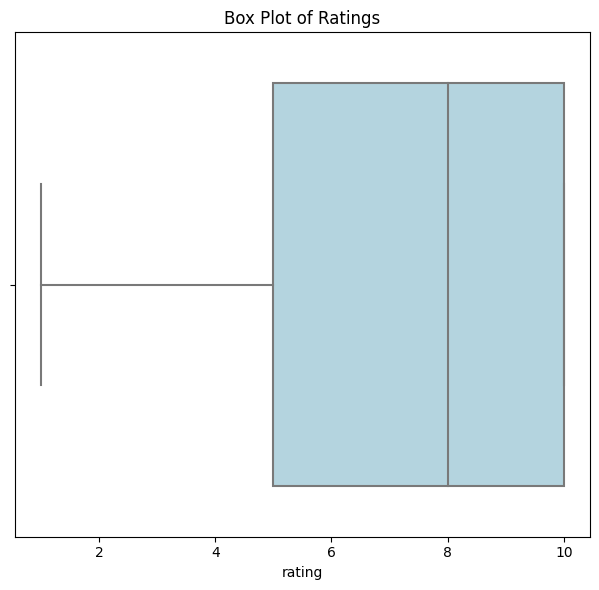

In [95]:
# Histogram for numerical variables (rating and usefulCount, assuming they exist)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(drug_features["rating"], bins=10, kde=True, color="blue")
plt.title("Distribution of Ratings")

plt.subplot(1, 2, 2)
sns.kdeplot(drug_features['rating'], fill=True, color='blue')
plt.title('Density Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.grid(True)

# Box plots to show spread and outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=drug_features["rating"], color="lightblue")
plt.title("Box Plot of Ratings")

plt.tight_layout()
plt.show()

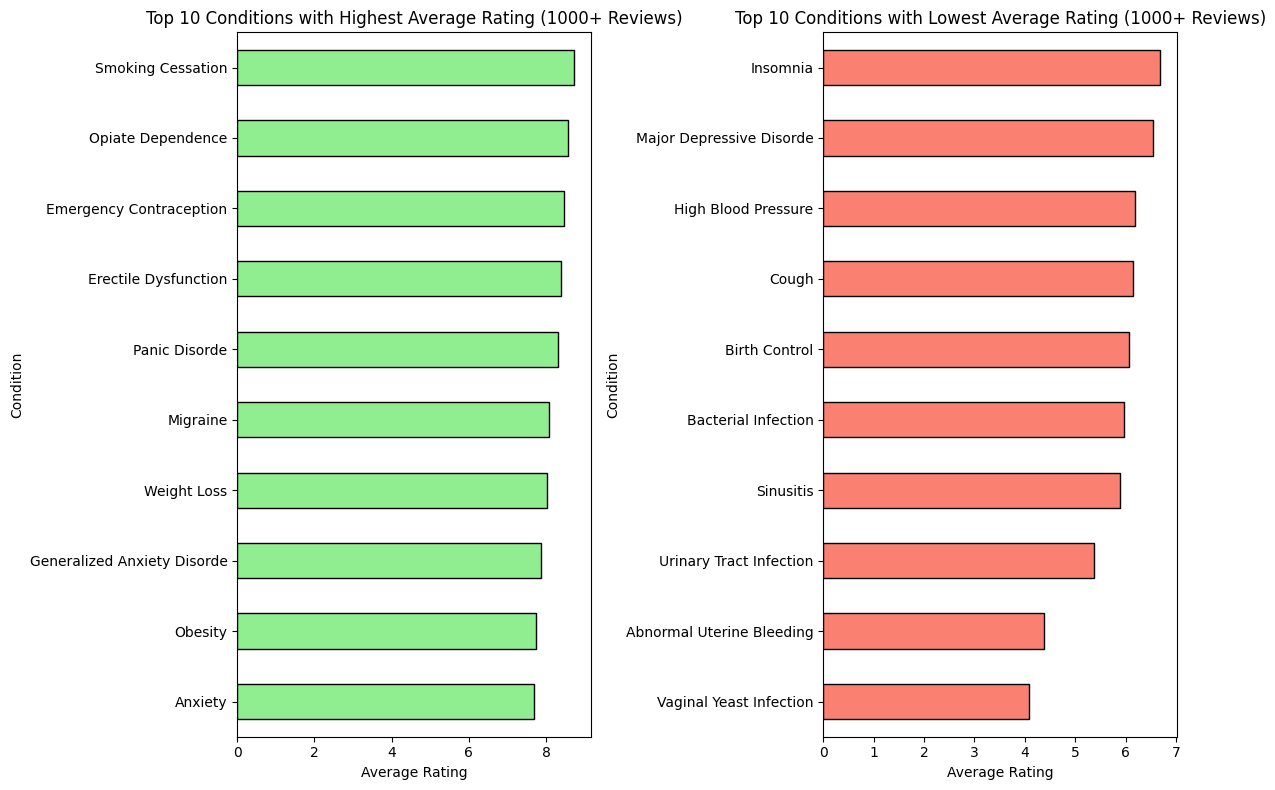

In [67]:
# Calculate the average rating for each condition
avg_rating_per_condition = drug_features.groupby("condition")["rating"].mean()
condition_review_counts = drug_features.groupby("condition").size()  # Count the number of reviews for each condition

conditions_at_least_100_reviews = condition_review_counts[condition_review_counts >= 1000].index
filtered_avg_ratings = avg_rating_per_condition.loc[conditions_at_least_100_reviews]

# Sort the conditions by average rating
sorted_ratings = filtered_avg_ratings.sort_values()

# Visualize the top 10 highest and lowest rated conditions with at least 100 reviews
plt.figure(figsize=(12, 8))

# Plot the top 10 highest rated conditions
plt.subplot(1, 2, 1)
sorted_ratings.tail(10).plot(kind="barh", color="lightgreen", edgecolor="black")
plt.title("Top 10 Conditions with Highest Average Rating (1000+ Reviews)")
plt.xlabel("Average Rating")
plt.ylabel("Condition")

# Plot the top 10 lowest rated conditions
plt.subplot(1, 2, 2)
sorted_ratings.head(10).plot(kind="barh", color="salmon", edgecolor="black")
plt.title("Top 10 Conditions with Lowest Average Rating (1000+ Reviews)")
plt.xlabel("Average Rating")
plt.ylabel("Condition")

# Display the plots
plt.tight_layout()
plt.show()

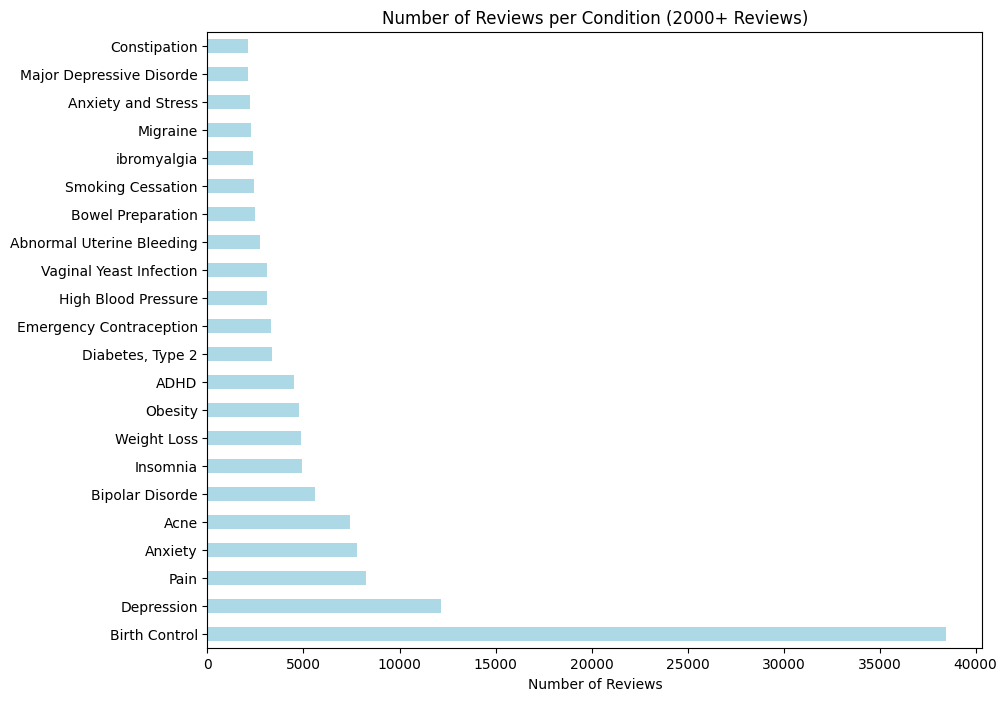

In [83]:
conditions_large_reviews = condition_review_counts[condition_review_counts >= 2000]

plt.figure(figsize=(12, 5))
conditions_large_reviews.plot(kind="barh", figsize=(10, 8), color="lightblue")
plt.title("Number of Reviews per Condition (2000+ Reviews)")
plt.xlabel("Number of Reviews")
plt.show()

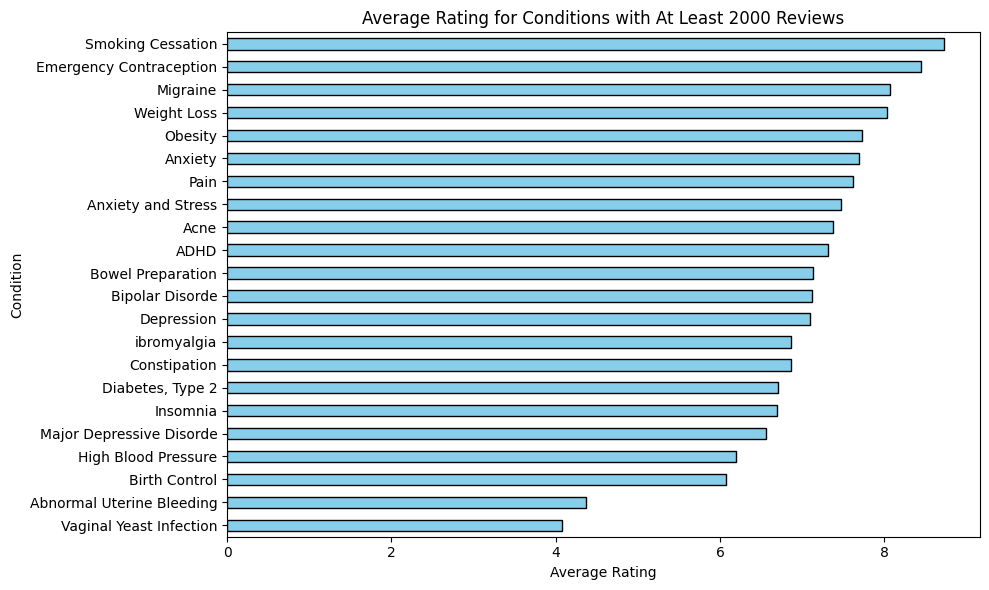

In [84]:
# Filter conditions with at least 2000 reviews
conditions_at_least_2000_reviews = condition_review_counts[condition_review_counts >= 2000].index
filtered_avg_ratings_2000 = avg_rating_per_condition.loc[conditions_at_least_2000_reviews]

plt.figure(figsize=(10, 6))
filtered_avg_ratings_2000.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")
plt.title("Average Rating for Conditions with At Least 2000 Reviews")
plt.xlabel("Average Rating")
plt.ylabel("Condition")
plt.tight_layout()

# Show the plot
plt.show()


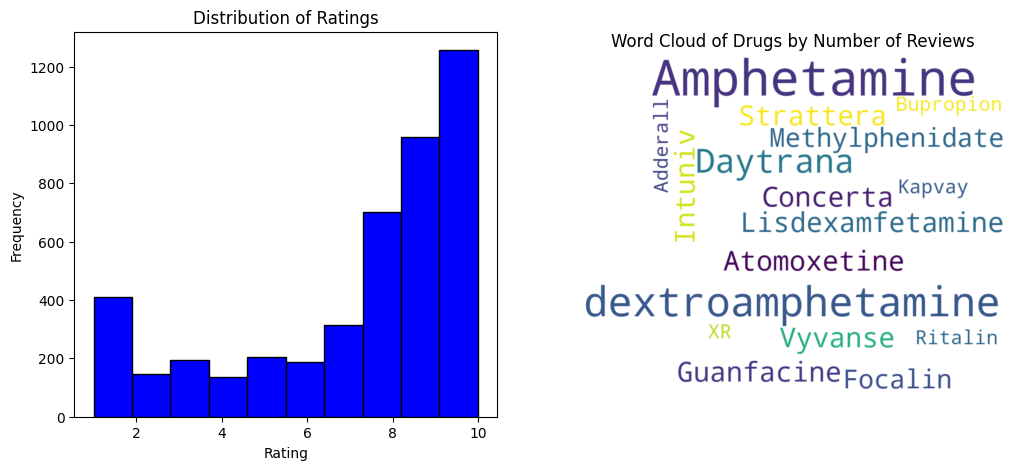

<Figure size 640x480 with 0 Axes>

In [68]:
adhd = drug_features[drug_features["condition"] == "ADHD"]

plt.figure(figsize=(12, 5))

# Histogram for "rating"
plt.subplot(1, 2, 1)
plt.hist(adhd["rating"], bins=10, color="blue", edgecolor="black")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")


# Generate a string of all drug names repeated based on their counts
drug_counts = adhd["drugName"].head(30).value_counts()
drug_string = " ".join([f"{drug} " * count for drug, count in drug_counts.items()])

# Create the word cloud
wordcloud = WordCloud(width=1000, height=800, background_color="white").generate(drug_string)

# Plot the word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title("Word Cloud of Drugs by Number of Reviews")
plt.show()

# Display the plots
plt.tight_layout()
plt.show()

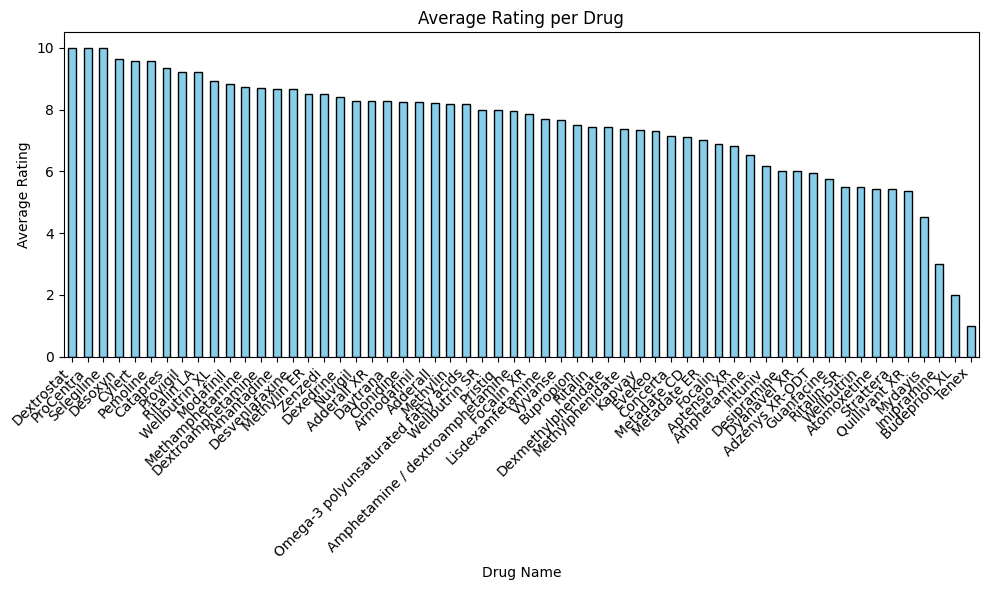

In [62]:
# Calculate the average rating for each drug
avg_rating_per_drug = adhd.groupby("drugName")["rating"].mean()

# Plotting the average rating per drug
plt.figure(figsize=(10, 6))
avg_rating_per_drug.sort_values(ascending=False).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Rating per Drug")
plt.xlabel("Drug Name")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()